# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [1]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(524, 700, 3) (1100400,)


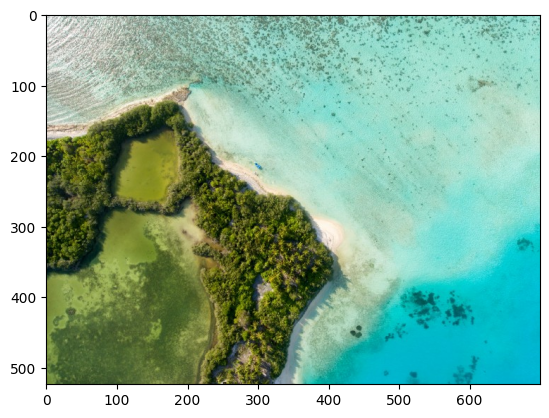

In [9]:
original_image = cv2.imread("/content/image1.jpeg")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
print (original_image.shape, original_image.ravel().shape)

(110, 150, 3) (49500,)


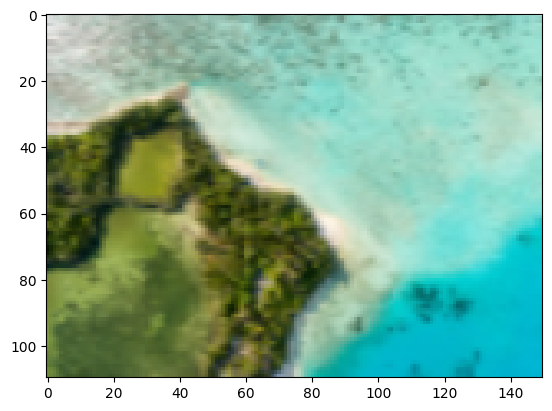

In [18]:
# Resize to a feasible size to avoid extensive computation
original_image = cv2.resize(original_image, (150,110))
plt.imshow(original_image)
print (original_image.shape, original_image.ravel().shape)

(110, 150, 3) (110, 150, 3)


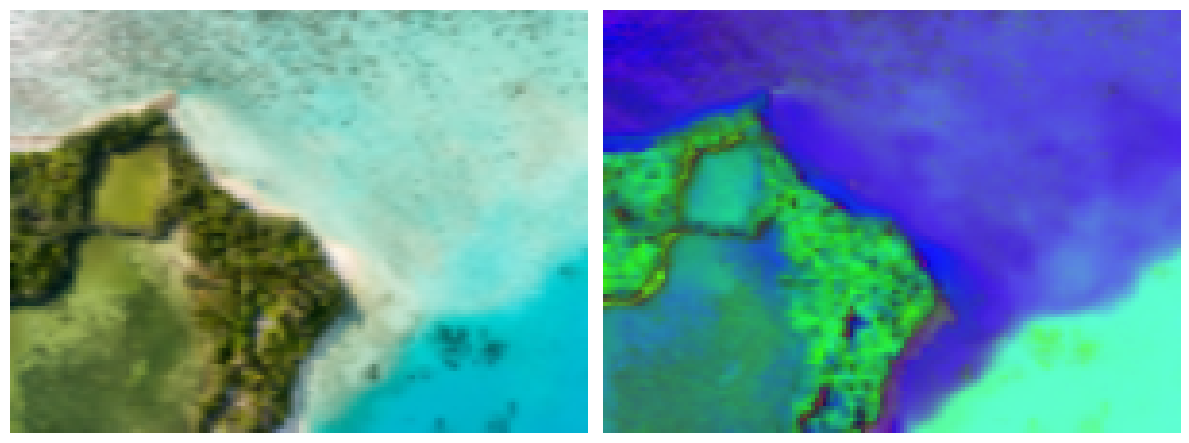

In [21]:
# Convert from BGR Color Space to HSV
img_rgb = original_image.copy()
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)

_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(img_rgb), axes[0].set_axis_off()
axes[1].imshow(img_hsv), axes[1].set_axis_off()
plt.tight_layout()

print (img_hsv.shape, img_rgb.shape)

In [22]:
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape(-1, 3)
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:,:,0].reshape(-1, 1)
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

(16500, 3) (16500, 1)


## **RGB image**

In [30]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0).fit( vectorized_rgb )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Predict to segment regions
clustered_rgb = kmeans.predict( vectorized_rgb )
clustered_rgb = clustered_rgb.reshape( img_rgb.shape[:2] )

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

(16500, 3) (110, 150, 3) (110, 150)


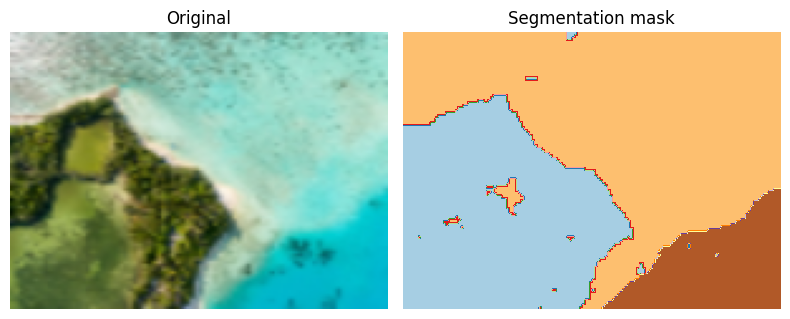

In [32]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_rgb, cmap = 'Paired' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

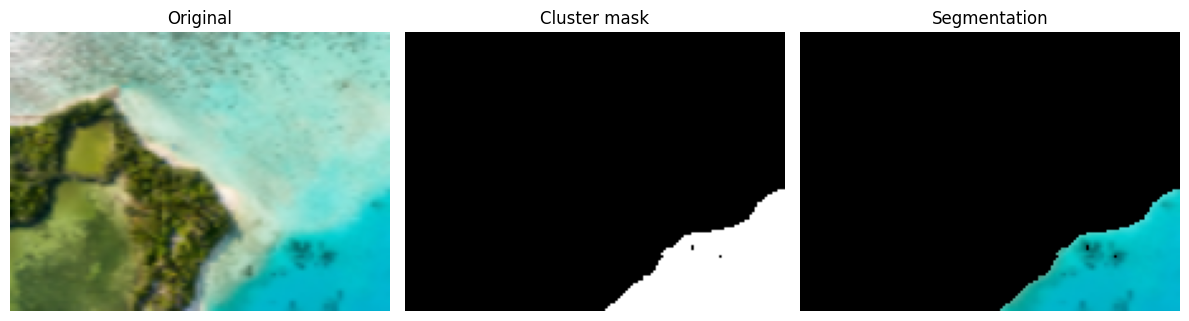

In [40]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 2

cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8)
# print (type(cluster_mask), cluster_mask.dtype,cluster_mask.shape)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(cluster_mask, cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow(masked_image), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **HSV image**

In [41]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0).fit( vectorized_hsv )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
# Predict to segment regions
clustered_hsv = kmeans.predict( vectorized_hsv )
clustered_hsv = clustered_hsv.reshape( img_hsv.shape[:2] )

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(16500, 1) (110, 150, 3) (110, 150)


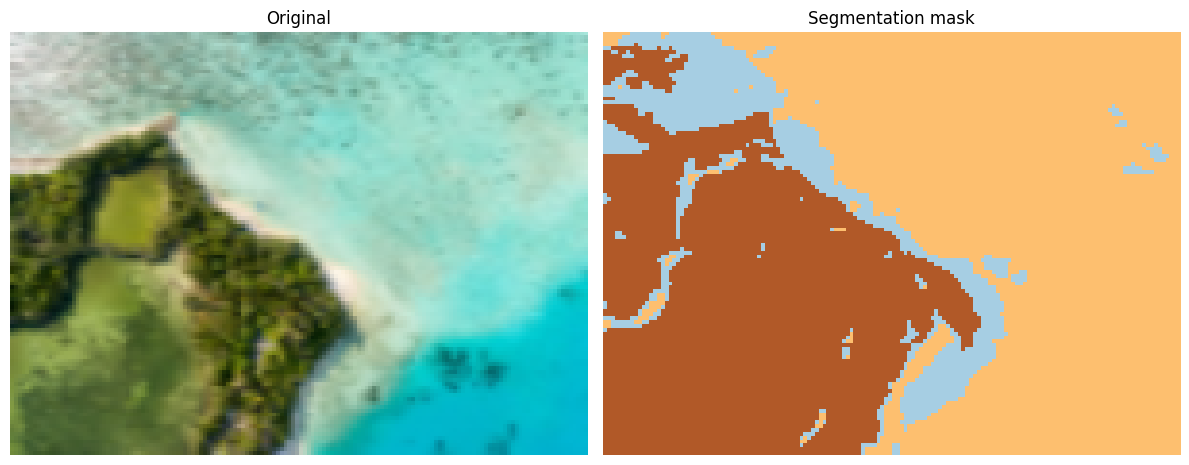

In [44]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv, cmap='Paired' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

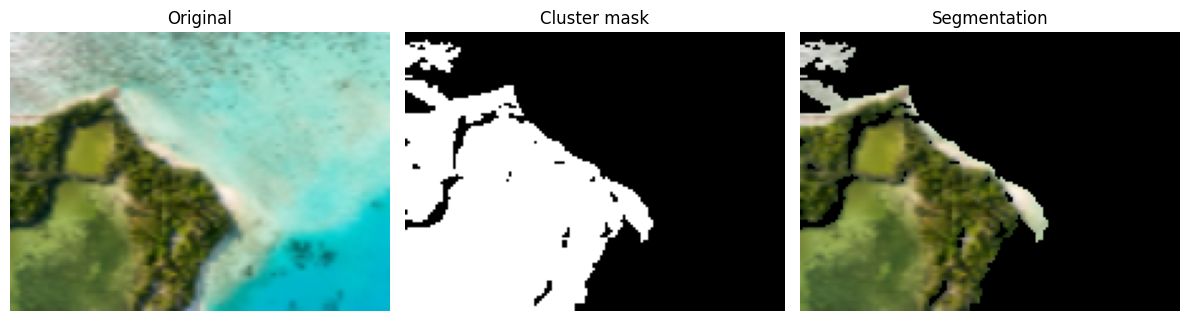

In [47]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 2

cluster_mask = np.array ( clustered_hsv == cluster , dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(cluster_mask, cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow(masked_image), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **Comparison**

In [ ]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

In [ ]:
# Mask clusters (turn the rest of pixels into black)
cluster = 0
cluster_mask_rgb = np.array ( _ , dtype = np.uint8)

cluster = 0
cluster_mask_hsv = np.array ( _ , dtype = np.uint8)

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = _ )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = _ )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
